In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


In [2]:
#Importing data set

df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')

In [3]:
#Showing data set

df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [4]:
#extracts the storage information (SSD and HDD sizes) from the Memory column in the dataset.
df['SSD'] = df['Memory'].str.extract(r'(\d+)GB SSD').fillna(0).astype(int)
df['HDD'] = df['Memory'].str.extract(r'(\d+)GB HDD').fillna(0).astype(int)


In [5]:
# # Checking for size
df.shape


(1303, 15)

In [6]:
# Checking for duplicatevalues
df.duplicated().sum()

0

In [7]:
# Checking for missing values
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
SSD                 0
HDD                 0
dtype: int64

In [8]:
df.drop(columns=['laptop_ID','Product'],inplace=True)

In [9]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,SSD,HDD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,128,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,256,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,512,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,256,0


In [10]:
# Removing unit suffixes ('GB' from Ram and 'kg' from Weight columns) 
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,SSD,HDD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,256,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,0


In [11]:
#and converting them to numeric values
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price_euros       1303 non-null   float64
 11  SSD               1303 non-null   int32  
 12  HDD               1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), object(7)
memory usage: 112.1+ KB


In [12]:
print(df['Company'].unique())


['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']


In [13]:
# print(data_df.corr())


# Data analysis

<Axes: xlabel='Company'>

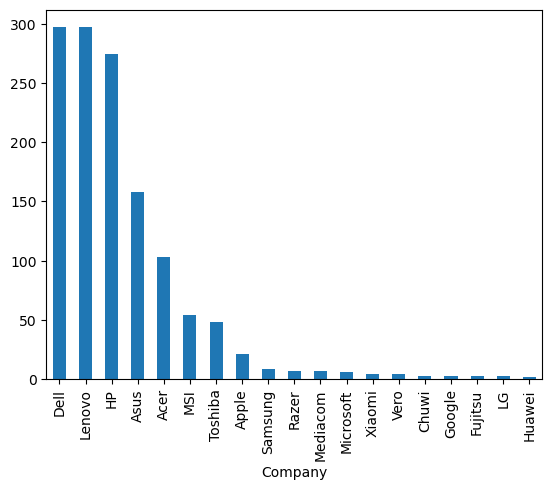

In [14]:
# Count the occurrences of each unique value in the 'Company' column and plot the results as a bar chart
df['Company'].value_counts().plot(kind='bar')

<Axes: xlabel='TypeName'>

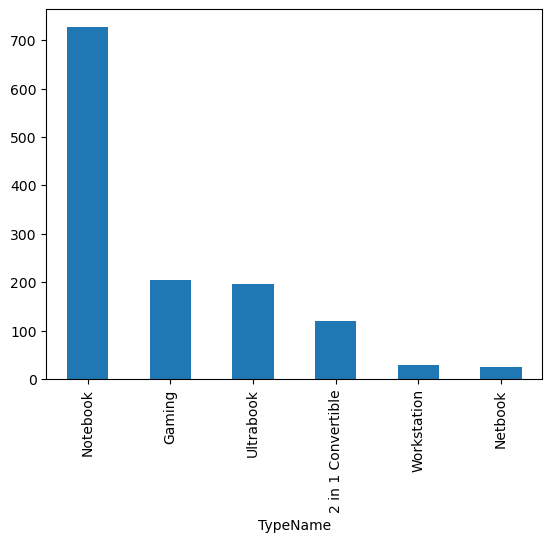

In [15]:
# Count the occurrences of each unique value in the 'TypeName' column and plot the results as a bar chart
df['TypeName'].value_counts().plot(kind='bar')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10420\1957148637.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_euros'])


<Axes: xlabel='Price_euros', ylabel='Density'>

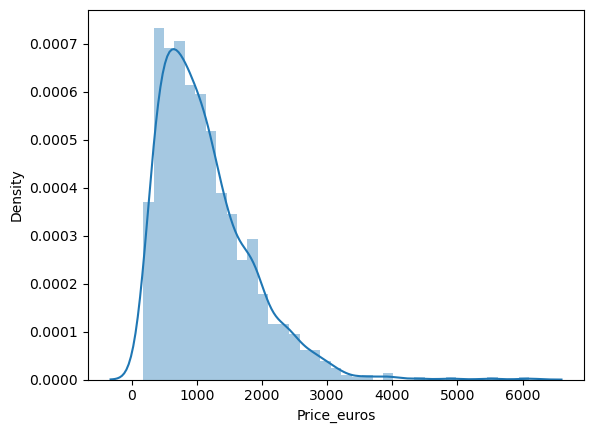

In [16]:
# Create a distribution plot (histogram + KDE) for the 'Price_euros' column using Seaborn
sns.distplot(df['Price_euros'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10420\1524998897.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

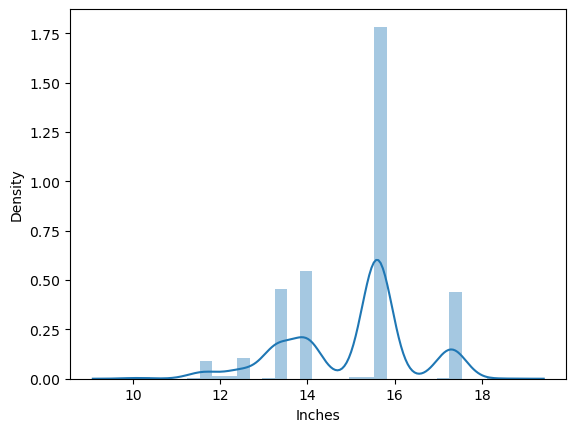

In [17]:
# Create a distribution plot (histogram + KDE) for the 'Inches' column using Seaborn
sns.distplot(df['Inches'])

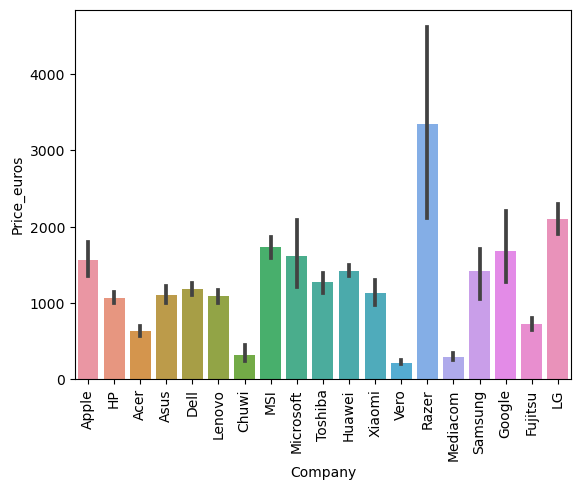

In [18]:
# Create a bar plot to visualize the relationship between 'Company' and 'Price_euros'
sns.barplot(x=df['Company'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

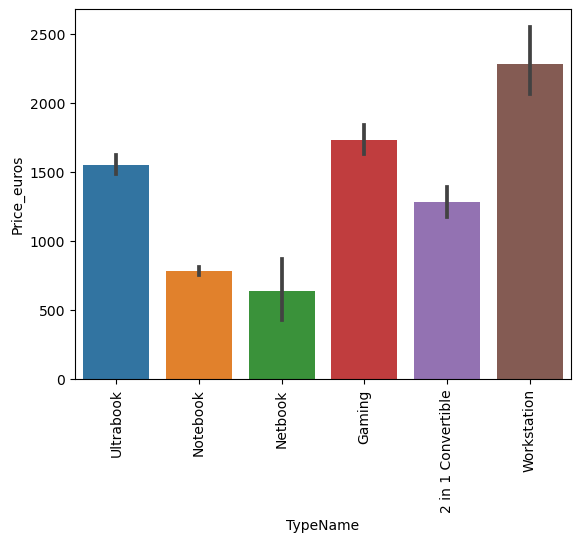

In [19]:
# Create a bar plot to visualize the relationship between 'TypeName' and 'Price_euros'
sns.barplot(x=df['TypeName'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Price_euros'>

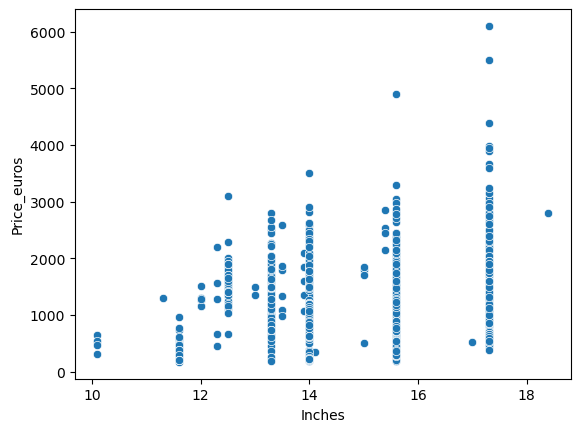

In [20]:
# Create a scatter plot to visualize the relationship between 'Inches' and 'Price_euros'
sns.scatterplot(x=df['Inches'],y=df['Price_euros'])

# Feature Engineering

In [21]:
#Counting different type of sceen resolution

df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [22]:
#Creating new column 'Touchscreen' and applying lamda function

df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Touchscreen
988,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,749.0,0,0,0
187,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,No OS,2.40,779.0,256,0,0
616,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,128GB SSD,AMD Radeon R5 M420,Linux,2.18,569.0,128,0,0
180,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,256GB SSD + 2TB HDD,AMD Radeon 530,Linux,2.02,1049.0,256,0,0
217,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.63,1031.0,256,0,0


<Axes: xlabel='Touchscreen'>

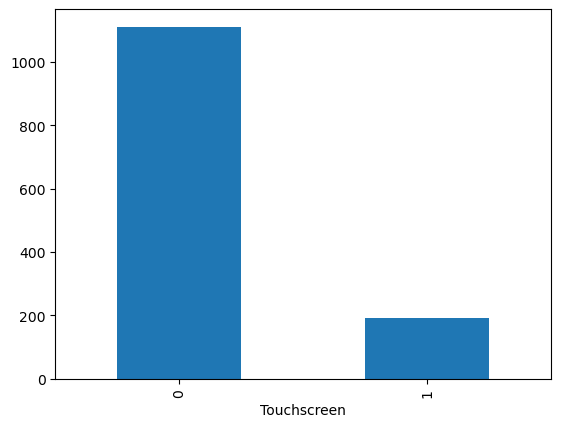

In [23]:
#Counting the numbers of touch screen laptops

df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price_euros'>

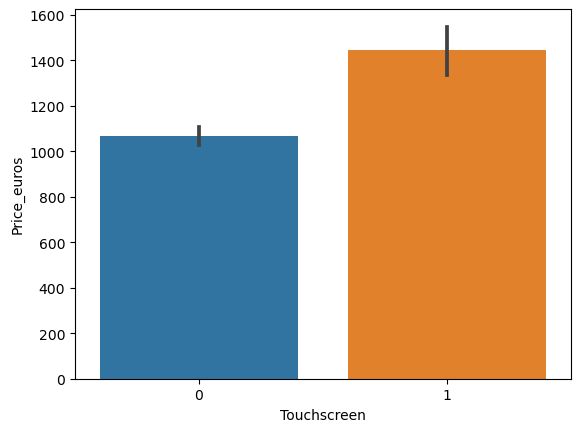

In [24]:
# Create a bar plot to visualize the relationship between 'Touchscreen' and 'Price_euros'
sns.barplot(x=df['Touchscreen'],y=df['Price_euros'])

In [25]:
#Creating new column 'Ips' and applying lamda function

df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,0,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,256,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512,0,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,0,0,1


<Axes: xlabel='IPS', ylabel='Price_euros'>

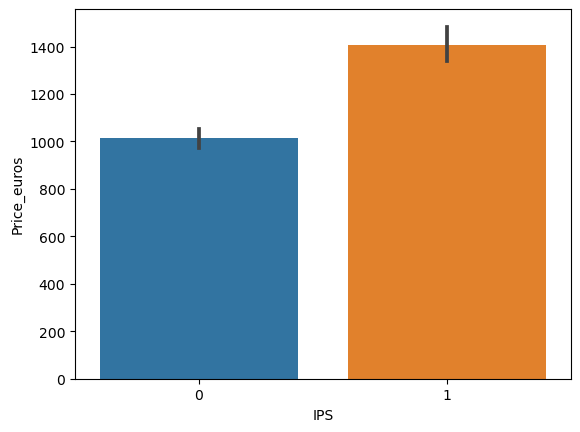

In [26]:
# Create a bar plot to visualize the relationship between 'IPS' and 'Price_euros'
sns.barplot(x=df['IPS'],y=df['Price_euros'])

In [27]:
#Storing the split value of ScreenResolution in  temporary dataframe new

new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [28]:
#Creating Columns and adding the values of new in X_resolution and Y_resolution

df['X_resolution'] = new[0]
df['Y_resolution'] = new[1]
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Touchscreen,IPS,X_resolution,Y_resolution
863,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,No OS,2.500,1017.00,0,0,0,1,IPS Panel Full HD 1920,1080
104,Microsoft,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10 S,1.252,1340.00,256,0,1,0,Touchscreen 2256,1504
1119,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,3.520,1312.49,128,0,0,0,Full HD 1920,1080
968,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,32,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.420,3149.00,256,0,0,1,IPS Panel Full HD 1920,1080
855,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.900,945.00,128,0,0,0,Full HD 1920,1080


In [29]:
#Extracting data of X resolution

df['X_resolution'] = df['X_resolution'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Touchscreen,IPS,X_resolution,Y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,0,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,256,0,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512,0,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,0,0,1,2560,1600


In [30]:
# changing data type of X_resolution and Y_resolution

df['X_resolution'] = df['X_resolution'].astype('int')
df['Y_resolution'] = df['Y_resolution'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price_euros       1303 non-null   float64
 11  SSD               1303 non-null   int32  
 12  HDD               1303 non-null   int32  
 13  Touchscreen       1303 non-null   int64  
 14  IPS               1303 non-null   int64  
 15  X_resolution      1303 non-null   int32  
 16  Y_resolution      1303 non-null   int32  


In [31]:
# Creating new column PPI(Pixels Per Inch) using the Inches,X_resolutionand Y_resolution Columns
# changing its datatype as float

df['PPI'] = (((df['X_resolution']**2) + (df['Y_resolution']**2))**0.5/df['Inches']).astype('float')

In [32]:
# df.info()
# Ensure all relevant columns are numeric
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Check correlation with 'Price_euros'
if 'Price_euros' in numeric_df.columns:
    print(numeric_df.corr()['Price_euros'])  # Compute correlation for numeric columns
else:
    print("euros' column is missing or has invalid data!")
    
df.head()


Inches         0.068197
Price_euros    1.000000
Touchscreen    0.191226
IPS            0.252208
PPI            0.473487
Name: Price_euros, dtype: float64


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Touchscreen,IPS,X_resolution,Y_resolution,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,0,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,256,0,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512,0,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,0,0,1,2560,1600,226.983005


In [33]:
#Droping the 'ScreenResolution','Inches','X_resolution' and 'Y_resolution' columns

df.drop(columns=['ScreenResolution','Inches','X_resolution','Y_resolution'],inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,0,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,256,0,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512,0,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,0,0,1,226.983005


In [34]:
# Counting numbers of different cpu

df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [35]:
# Spliting three words from CPU volumn and save in Cpu Name

df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Touchscreen,IPS,PPI,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,0,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,256,0,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512,0,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,0,0,1,226.983005,Intel Core i5


In [36]:
# Defining function which will help to specify the processor

def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [37]:
# Apply the function 'fetch_processor' to each entry to new 'Cpu Brand' column
df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Touchscreen,IPS,PPI,Cpu Name,Cpu Brand
83,Lenovo,Notebook,AMD A6-Series 9220 2.5GHz,4,128GB SSD,AMD R4 Graphics,Windows 10,2.20,399.0,128,0,0,0,141.211998,AMD A6-Series 9220,AMD Processor
449,Microsoft,Ultrabook,Intel Core i7 7660U 2.5GHz,16,512GB SSD,Intel Iris Plus Graphics 640,Windows 10 S,1.25,2589.0,512,0,1,0,200.842560,Intel Core i7,Intel Core i7
359,Dell,Notebook,Intel Core i5 7300U 2.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,1427.0,256,0,0,0,157.350512,Intel Core i5,Intel Core i5
107,Asus,Ultrabook,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.30,1193.0,256,0,0,1,157.350512,Intel Core i7,Intel Core i7
420,Lenovo,2 in 1 Convertible,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.00,1899.0,512,0,1,1,282.423996,Intel Core i7,Intel Core i7


<Axes: xlabel='Cpu Brand'>

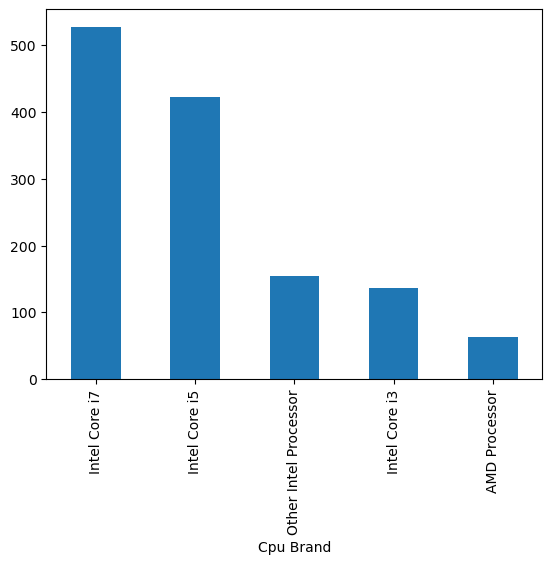

In [38]:
# Count the occurrences of each unique value and plot the results as a bar chart
df['Cpu Brand'].value_counts().plot(kind='bar')

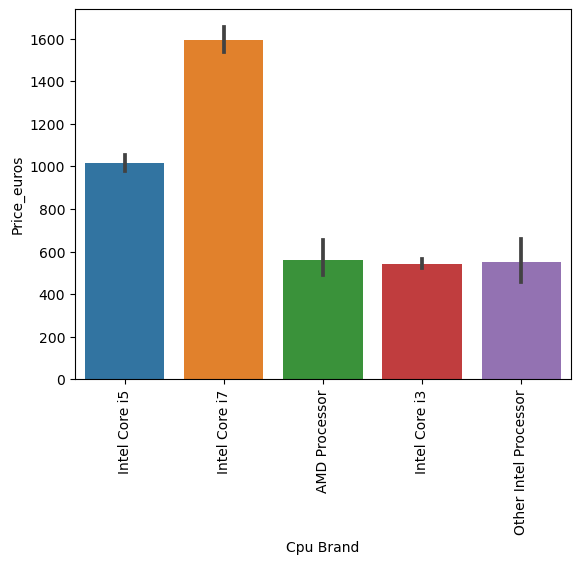

In [39]:
#Create a bar plot to visualize the relationship in'Cpu Brand' and 'Price_euros'
sns.barplot(x=df['Cpu Brand'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [40]:
#Droping columns 'Cpu','Cpu Name

df.drop(columns=['Cpu','Cpu Name'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Touchscreen,IPS,PPI,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,0,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,256,0,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512,0,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,0,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

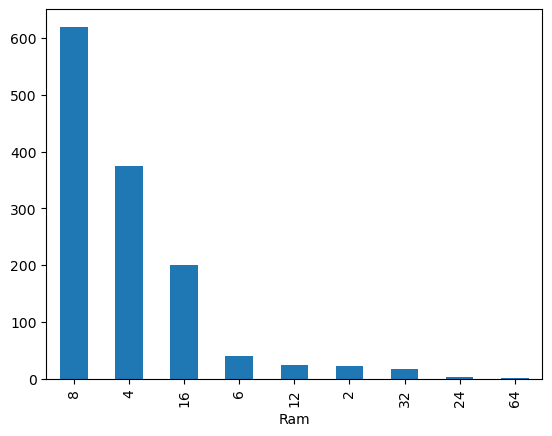

In [41]:
# Count the occurrences of each unique value 
df['Ram'].value_counts().plot(kind='bar')

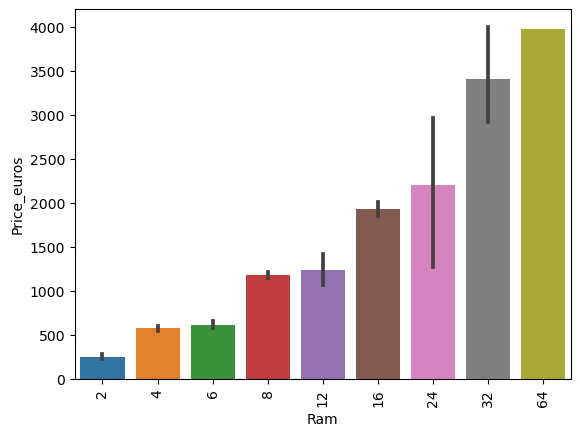

In [42]:
#Showing relation of price and Ram in bar

sns.barplot(x=df['Ram'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [43]:
#Counting the types of Memory used
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [44]:
# Ensure Memory column is cleaned properly
df['Memory'] = df['Memory'].astype(str).replace(r'\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '000')

# Split into two layers
new = df['Memory'].str.split("+", n=1, expand=True)

df['first'] = new[0].str.strip()  # Clean and trim spaces
df['second'] = new[1]  # Handle second part of memory

# Check for storage types in first layer
df['Layer1HDD'] = df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

# Remove non-numeric characters from 'first'
df['first'] = df['first'].str.replace(r'\D', '', regex=True)

# Handle second layer (if exists)
df['second'] = df['second'].fillna('0')  # Replace NaN with '0'
df['Layer2HDD'] = df['second'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

# Remove non-numeric characters from 'second'
df['second'] = df['second'].str.replace(r'\D', '', regex=True)

# Convert cleaned values to integers
df['first'] = pd.to_numeric(df['first'], errors='coerce').fillna(0).astype(int)
df['second'] = pd.to_numeric(df['second'], errors='coerce').fillna(0).astype(int)

# Calculate storage capacities
df['HDD'] = (df['first'] * df['Layer1HDD'] + df['second'] * df['Layer2HDD'])
df['SSD'] = (df['first'] * df['Layer1SSD'] + df['second'] * df['Layer2SSD'])
df['Hybrid'] = (df['first'] * df['Layer1Hybrid'] + df['second'] * df['Layer2Hybrid'])
df['Flash_Storage'] = (df['first'] * df['Layer1Flash_Storage'] + df['second'] * df['Layer2Flash_Storage'])

# Drop unnecessary columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                 'Layer2Flash_Storage'], inplace=True)

# Sample output
df.sample(5)


,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Touchscreen,IPS,PPI,Cpu Brand,Hybrid,Flash_Storage
304,Asus,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,1265.0,128,1000,0,0,141.211998,Intel Core i7,0,0
1258,Lenovo,Notebook,8,1000 Hybrid,AMD Radeon R5 M330,Windows 7,2.32,895.0,0,0,0,0,141.211998,Intel Core i7,1000,0
346,HP,Notebook,2,32 Flash Storage,Intel HD Graphics 400,Windows 10,1.44,279.0,0,0,0,0,111.935204,Other Intel Processor,0,32
190,Lenovo,2 in 1 Convertible,16,1000 SSD,Intel HD Graphics 620,Windows 10,1.42,2824.0,1000,0,1,0,209.800683,Intel Core i7,0,0
221,Lenovo,2 in 1 Convertible,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.74,899.0,256,0,0,1,157.350512,Intel Core i5,0,0


In [45]:
# Ensure all relevant columns are numeric
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Check correlation with 'Price_euros'
if 'Price_euros' in numeric_df.columns:
    print(numeric_df.corr()['Price_euros'])  # Compute correlation for numeric columns
else:
    print("euros' column is missing or has invalid data!")
    
df.head()

Price_euros      1.000000
SSD              0.670799
HDD             -0.096441
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price_euros, dtype: float64


,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Touchscreen,IPS,PPI,Cpu Brand,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,0,0,1,226.983005,Intel Core i5,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,0,127.677940,Intel Core i5,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,256,0,0,0,141.211998,Intel Core i5,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512,0,0,1,220.534624,Intel Core i7,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,0,0,1,226.983005,Intel Core i5,0,0


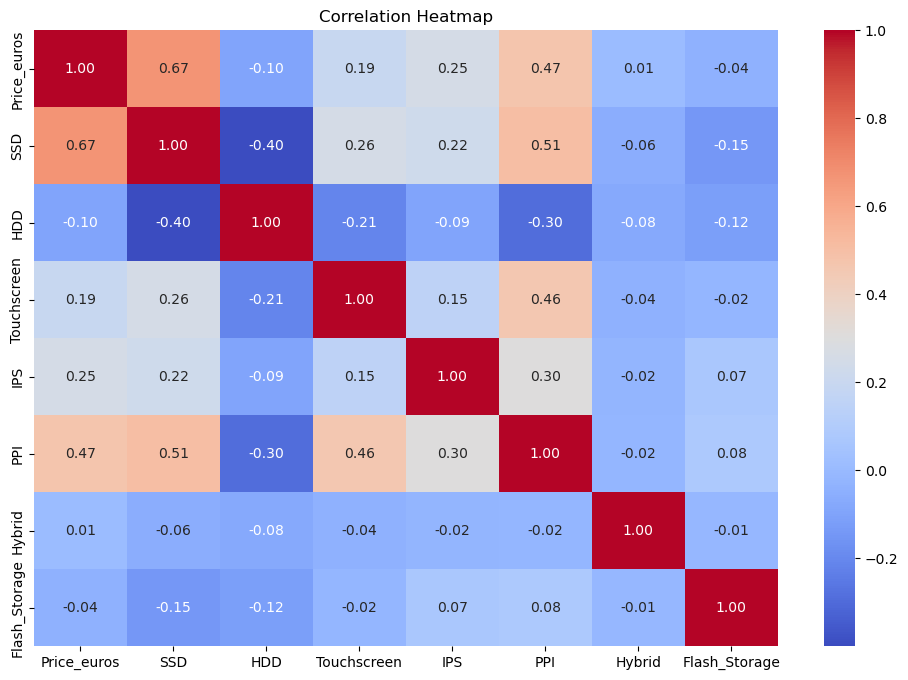

In [46]:
# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

# Set the title for the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

In [47]:
#Droping the colums which have less corelation with price

df.drop(columns=['Memory','Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Touchscreen,IPS,PPI,Cpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,0,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,256,0,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,512,0,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,0,0,1,226.983005,Intel Core i5


In [48]:
# Count the occurrences of each unique value
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [49]:
#Extracting only the Brand name From GPU
df['Gpu Brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Touchscreen,IPS,PPI,Cpu Brand,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,0,0,1,226.983005,Intel Core i5,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,0,127.677940,Intel Core i5,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,256,0,0,0,141.211998,Intel Core i5,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,512,0,0,1,220.534624,Intel Core i7,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,0,0,1,226.983005,Intel Core i5,Intel


In [50]:
# Count the occurrences of each unique value
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [51]:
#Removing the row with ARM Gpu

df = df[df['Gpu Brand'] != 'ARM']
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

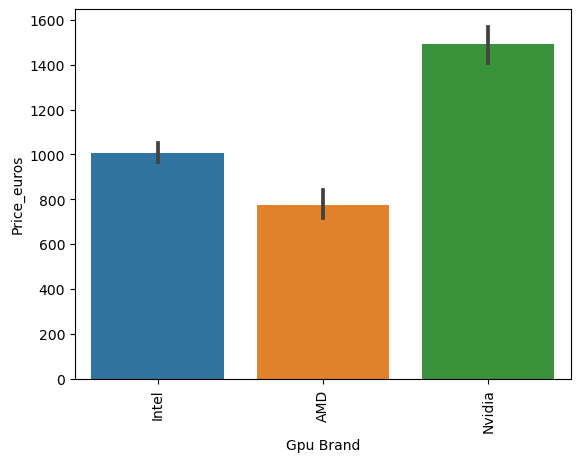

In [52]:
#Create a bar plot to visualize the relationship between GpuBrand and Price_euros
sns.barplot(x=df['Gpu Brand'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [53]:
# Drop the 'Gpu'
df.drop(columns=['Gpu'],inplace=True)
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10420\2023358321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'],inplace=True)


,Company,TypeName,Ram,OpSys,Weight,Price_euros,SSD,HDD,Touchscreen,IPS,PPI,Cpu Brand,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,1339.69,128,0,0,1,226.983005,Intel Core i5,Intel
1,Apple,Ultrabook,8,macOS,1.34,898.94,0,0,0,0,127.677940,Intel Core i5,Intel
2,HP,Notebook,8,No OS,1.86,575.00,256,0,0,0,141.211998,Intel Core i5,Intel
3,Apple,Ultrabook,16,macOS,1.83,2537.45,512,0,0,1,220.534624,Intel Core i7,AMD
4,Apple,Ultrabook,8,macOS,1.37,1803.60,256,0,0,1,226.983005,Intel Core i5,Intel


In [54]:
# Count the occurrences of each unique value
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [55]:
def os_category(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [56]:
# Function to categorize operating systems into category
df['Operating System'] = df['OpSys'].apply(os_category)
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10420\2852079428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Operating System'] = df['OpSys'].apply(os_category)


,Company,TypeName,Ram,OpSys,Weight,Price_euros,SSD,HDD,Touchscreen,IPS,PPI,Cpu Brand,Gpu Brand,Operating System
0,Apple,Ultrabook,8,macOS,1.37,1339.69,128,0,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,898.94,0,0,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,No OS,1.86,575.00,256,0,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,2537.45,512,0,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,1803.60,256,0,0,1,226.983005,Intel Core i5,Intel,Mac


In [57]:
# Applying the 'os_category' function to the 'OpSys' column and create a new column 'Operating System'
df.drop(columns=['OpSys'],inplace=True)
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10420\1025701338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OpSys'],inplace=True)


,Company,TypeName,Ram,Weight,Price_euros,SSD,HDD,Touchscreen,IPS,PPI,Cpu Brand,Gpu Brand,Operating System
0,Apple,Ultrabook,8,1.37,1339.69,128,0,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,1.34,898.94,0,0,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,1.86,575.00,256,0,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,2537.45,512,0,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,1.37,1803.60,256,0,0,1,226.983005,Intel Core i5,Intel,Mac


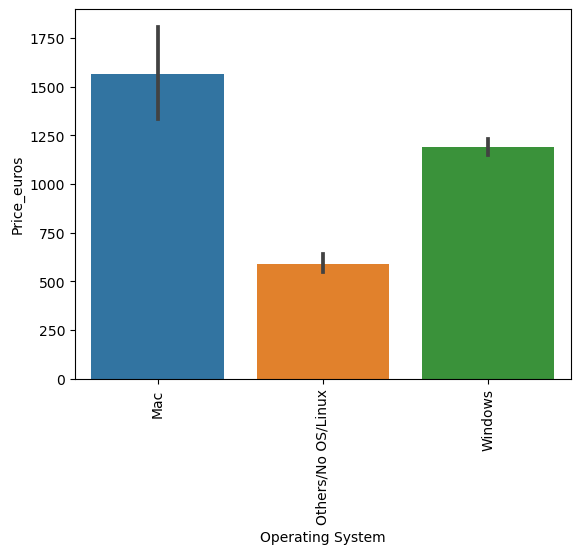

In [58]:
# Create a bar plot to visualize the relationship
sns.barplot(x=df['Operating System'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10420\3243750664.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price_euros']))


<Axes: xlabel='Price_euros', ylabel='Density'>

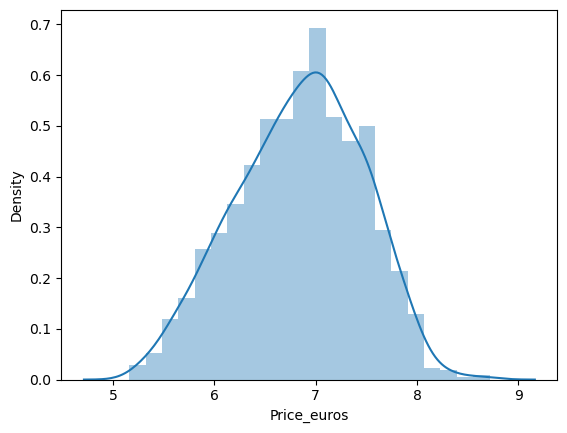

In [59]:
# Create a distribution plot of the logarithm of 'Price_euros'
sns.distplot(np.log(df['Price_euros']))

In [60]:
# Separate the features (X) from the target variable (Y)
X = df.drop(columns=['Price_euros'])
Y = np.log(df['Price_euros'])

In [61]:
X

,Company,TypeName,Ram,Weight,SSD,HDD,Touchscreen,IPS,PPI,Cpu Brand,Gpu Brand,Operating System
0,Apple,Ultrabook,8,1.37,128,0,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,1.86,256,0,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,512,0,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,1.37,256,0,0,1,226.983005,Intel Core i5,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,128,0,1,1,157.350512,Intel Core i7,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,512,0,1,1,276.053530,Intel Core i7,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,0,0,111.935204,Other Intel Processor,Intel,Windows
1301,HP,Notebook,6,2.19,0,1000,0,0,100.454670,Intel Core i7,AMD,Windows


In [62]:
Y

0       7.200194
1       6.801216
2       6.354370
3       7.838915
4       7.497540
          ...   
1298    6.458338
1299    7.312553
1300    5.433722
1301    6.638568
1302    5.910797
Name: Price_euros, Length: 1302, dtype: float64

In [63]:
# Identify categorical and numerical columns
categorical_columns = ['Company', 'TypeName', 'Cpu Brand','Gpu Brand','Operating System']  
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Ensure categorical columns are correct
categorical_columns = [col for col in categorical_columns if col in X.columns]

In [64]:
# Split the dataset into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15,random_state=2)

In [65]:
X_train

,Company,TypeName,Ram,Weight,SSD,HDD,Touchscreen,IPS,PPI,Cpu Brand,Gpu Brand,Operating System
183,Toshiba,Notebook,8,2.00,128,0,0,0,100.454670,Intel Core i5,Intel,Windows
1141,MSI,Gaming,8,2.40,128,1000,0,0,141.211998,Intel Core i7,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,0,0,135.094211,Other Intel Processor,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,0,1000,1,1,141.211998,Intel Core i3,Intel,Windows
878,Dell,Notebook,4,2.18,128,1000,0,0,141.211998,Intel Core i5,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,500,0,0,100.454670,Intel Core i3,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,512,0,0,0,141.211998,Intel Core i7,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,1000,0,0,100.454670,AMD Processor,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,2000,0,0,100.454670,Intel Core i3,Nvidia,Others/No OS/Linux


In [66]:
Y_train

183     6.675823
1141    7.041237
1049    5.662613
1020    6.679587
878     6.816188
          ...   
466     6.150603
299     7.291656
493     6.361302
527     6.129050
1193    7.058758
Name: Price_euros, Length: 1106, dtype: float64

In [67]:
X_test

,Company,TypeName,Ram,Weight,SSD,HDD,Touchscreen,IPS,PPI,Cpu Brand,Gpu Brand,Operating System
248,HP,Notebook,4,1.49,0,500,0,1,165.632118,Intel Core i5,Intel,Windows
555,Asus,Notebook,4,2.00,0,500,0,0,100.454670,Other Intel Processor,Intel,Others/No OS/Linux
1251,HP,Notebook,4,1.86,0,500,0,0,100.454670,AMD Processor,AMD,Windows
547,Lenovo,Notebook,4,2.15,0,1000,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux
885,HP,2 in 1 Convertible,4,1.28,256,0,1,0,165.632118,Intel Core i5,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
1129,HP,Gaming,8,3.35,128,1000,0,1,127.335675,Intel Core i5,Nvidia,Windows
172,Lenovo,Notebook,4,2.20,0,500,0,0,100.454670,AMD Processor,AMD,Others/No OS/Linux
322,Asus,Notebook,8,2.00,256,0,0,0,157.350512,Intel Core i7,Intel,Windows
996,HP,Ultrabook,8,1.11,256,0,1,1,165.632118,Intel Core i7,Intel,Windows


# Linear Regression

In [68]:
# Define column transformer
step1 = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_columns),

], remainder='passthrough')

# Linear Regression Model
step2 = LinearRegression()


pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, Y_train)
Y_pred_lr = pipe.predict(X_test)

# Linear Regression Evaluation
print('Linear Regression:')
print('R2 score:', r2_score(Y_test, Y_pred_lr))
print('MAE:', mean_absolute_error(Y_test, Y_pred_lr))


Linear Regression:
R2 score: 0.8073277448418643
MAE: 0.21017827976429027


In [69]:
np.exp(0.21)

1.2336780599567432

# Random Forest

In [70]:
step2 = RandomForestRegressor( random_state=3,
                              n_estimators=100,
                              max_samples=0.6,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

Y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,Y_pred))
print('MAE',mean_absolute_error(Y_test,Y_pred))

R2 score 0.8872341652003941
MAE 0.1584092246786444


# K-Nearest Neighbors (KNN)

In [71]:
step2 = KNeighborsRegressor(n_neighbors=3)

# K-Nearest Neighbors Model
knn_model = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the model
knn_model.fit(X_train, Y_train)

# Make predictions
Y_pred_knn = knn_model.predict(X_test)

# KNN Evaluation
print('K-Nearest Neighbors:')
print('R2 score:', r2_score(Y_test, Y_pred_knn))
print('MAE:', mean_absolute_error(Y_test, Y_pred_knn))

K-Nearest Neighbors:
R2 score: 0.8027675291937719
MAE: 0.19345629373900278


# Evaluating the Model

In [72]:
# K-Nearest Neighbors Evaluation
print('K-Nearest Neighbors:')
print('R2 score:', r2_score(Y_test, Y_pred_knn))
print('MAE:', mean_absolute_error(Y_test, Y_pred_knn))

# Random Forest Evaluation
print('Random Forest:')
print('R2 score:', r2_score(Y_test, Y_pred))
print('MAE:', mean_absolute_error(Y_test, Y_pred))

# Linear Regression Evaluation
print('Linear Regression:')
print('R2 score:', r2_score(Y_test, Y_pred_lr))
print('MAE:', mean_absolute_error(Y_test, Y_pred_lr))


K-Nearest Neighbors:
R2 score: 0.8027675291937719
MAE: 0.19345629373900278
Random Forest:
R2 score: 0.8872341652003941
MAE: 0.1584092246786444
Linear Regression:
R2 score: 0.8073277448418643
MAE: 0.21017827976429027


# COMPARE the Models

In [73]:
# Store evaluation metrics in a dictionary for comparison
evaluation_metrics = {
    'KNN': {
        'R2': r2_score(Y_test, Y_pred_knn),
        'MAE': mean_absolute_error(Y_test, Y_pred_knn)
    },
    'Random Forest': {
        'R2': r2_score(Y_test, Y_pred),
        'MAE': mean_absolute_error(Y_test, Y_pred)
    },
    'Linear Regression': {
        'R2': r2_score(Y_test, Y_pred_lr),
        'MAE': mean_absolute_error(Y_test, Y_pred_lr)
    }
}
# Find the best model
best_model = max(evaluation_metrics, key=lambda x: evaluation_metrics[x]['R2'])
print(f"The best model is {best_model} with:")
print(f"R2 Score: {evaluation_metrics[best_model]['R2']}")
print(f"MAE: {evaluation_metrics[best_model]['MAE']}")

The best model is Random Forest with:
R2 Score: 0.8872341652003941
MAE: 0.1584092246786444


# Display the best performance

In [74]:
# Best model's performance
print(f"Best Model: {best_model}")
print(f"R2 Score: {evaluation_metrics[best_model]['R2']}")
print(f"Mean Absolute Error: {evaluation_metrics[best_model]['MAE']}")


Best Model: Random Forest
R2 Score: 0.8872341652003941
Mean Absolute Error: 0.1584092246786444


In [75]:
df

,Company,TypeName,Ram,Weight,Price_euros,SSD,HDD,Touchscreen,IPS,PPI,Cpu Brand,Gpu Brand,Operating System
0,Apple,Ultrabook,8,1.37,1339.69,128,0,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,1.34,898.94,0,0,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,1.86,575.00,256,0,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,2537.45,512,0,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,1.37,1803.60,256,0,0,1,226.983005,Intel Core i5,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,638.00,128,0,1,1,157.350512,Intel Core i7,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1499.00,512,0,1,1,276.053530,Intel Core i7,Intel,Windows
1300,Lenovo,Notebook,2,1.50,229.00,0,0,0,0,111.935204,Other Intel Processor,Intel,Windows
1301,HP,Notebook,6,2.19,764.00,0,1000,0,0,100.454670,Intel Core i7,AMD,Windows
